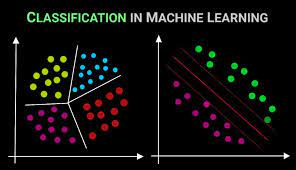

 # >Importnt to remember :-


We are Createing  the Decision Tree classifier and visualize it graphically.



# > Purpose & Goal:-

If we feed any new data to this classifier, it would be able to predict the right class accordingly.

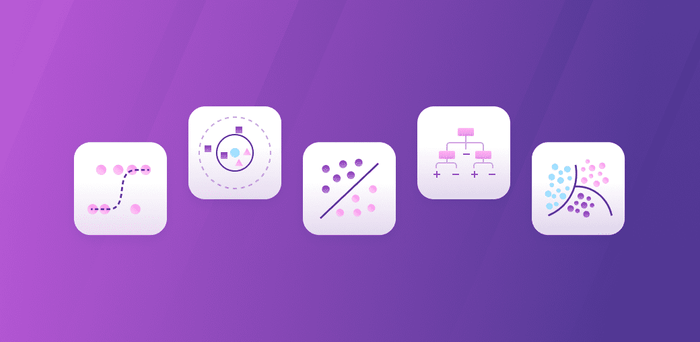

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
# Import necessary libraries for graph viz
#from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas.util.testing as tm
%matplotlib inline

C:\Users\dell\AppData\Local\Temp\ipykernel_10168\2672481376.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Importing the data : 

In [2]:
Data = pd.read_csv("Iris_classifcaition .csv")
print("Dataset loaded successfully")

Dataset loaded successfully


In [4]:
Data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# 2. { Explore the data }

In [5]:
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
Data.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
Data.shape

(150, 6)

In [10]:
Data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
Data.ndim

2

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
Data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
Data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [15]:
# Dropping the unwanted Data columns :

Data.drop('Id', axis = 1 , inplace= True)

Data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 3. Data preprocessing :

 Null check :

In [16]:
Data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
# No  null values

In [23]:
#  No Duplicate

G:\anaconda\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


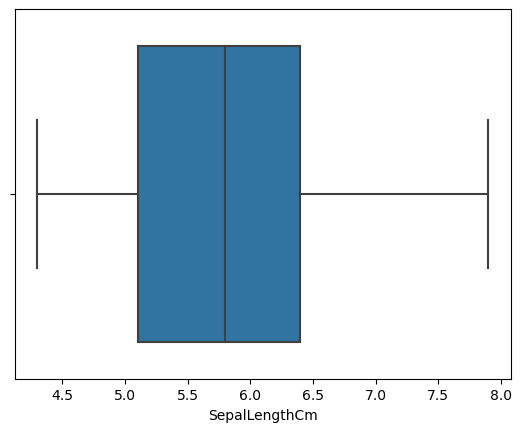

G:\anaconda\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


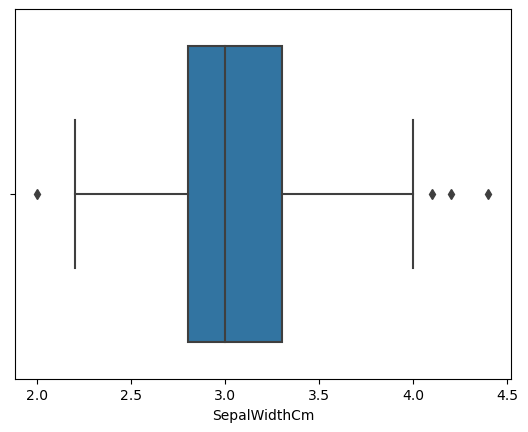

G:\anaconda\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


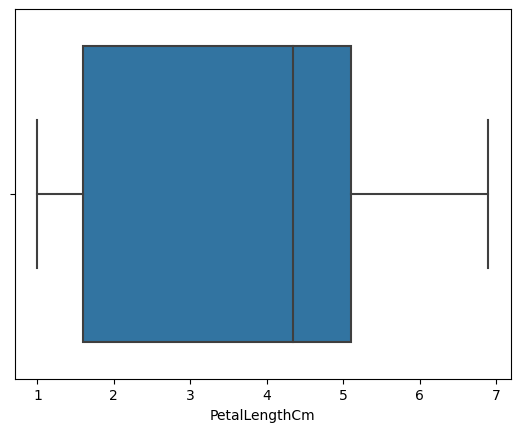

G:\anaconda\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


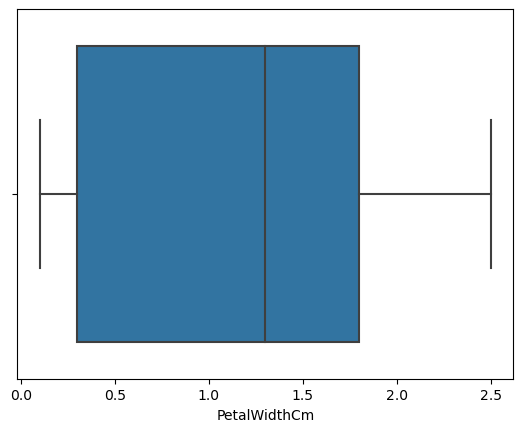

In [24]:
# Boxplot:
for cl in Data.columns:
    if Data[cl].dtype != 'object': 
        sns.boxplot(Data[cl])
        plt.show()


Histogram of each feature

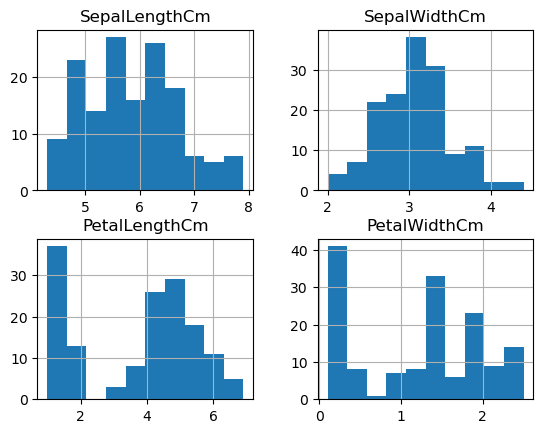

In [25]:
Data.hist()
plt.show()

 Box plot details 

G:\anaconda\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


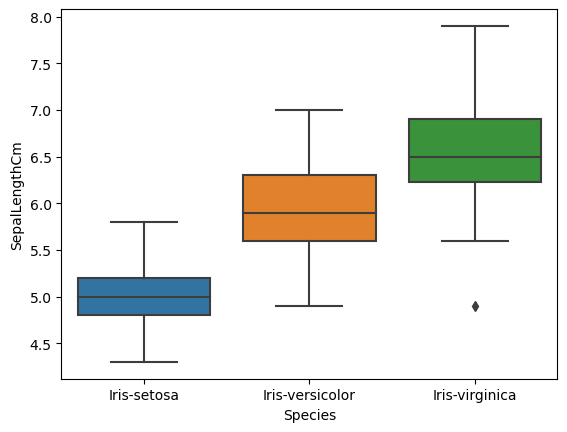

G:\anaconda\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


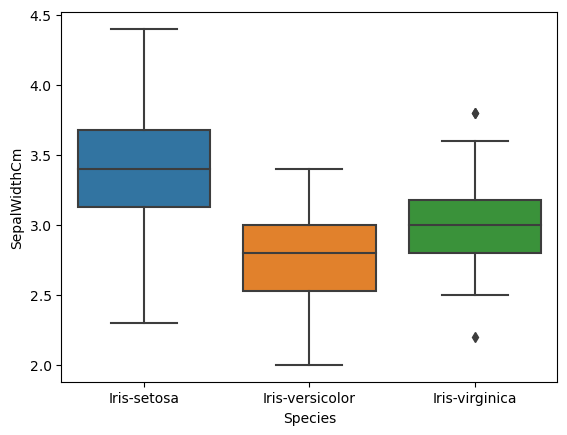

G:\anaconda\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


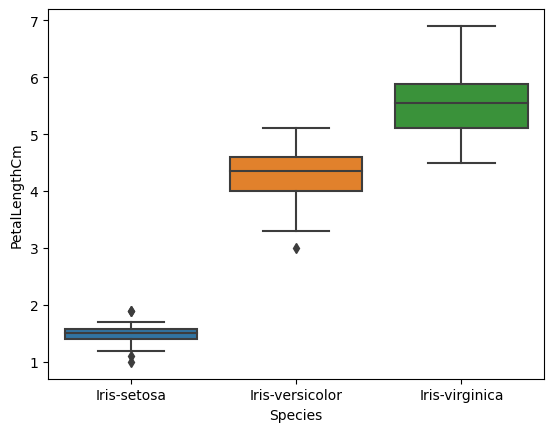

G:\anaconda\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


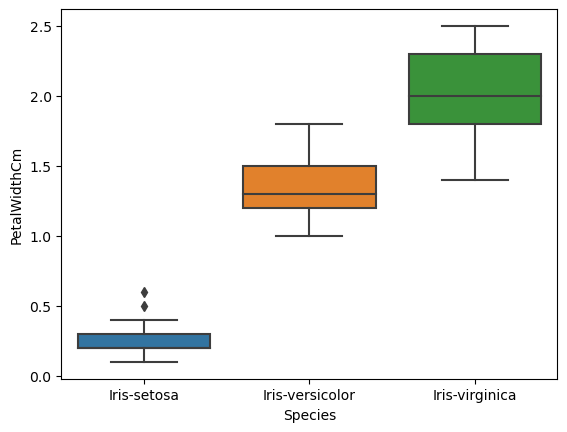

In [26]:
for col in Data.columns:
    if Data[col].dtypes != "object":
        sns.boxplot(Data['Species'],Data[col])     #Hence the features with Species has linear realtionship
        plt.show()

# Correlation s:

In [30]:
Data.corr().sum()

SepalLengthCm    2.580339
SepalWidthCm     0.113571
PetalLengthCm    2.413995
PetalWidthCm     2.424167
dtype: float64

<AxesSubplot:>

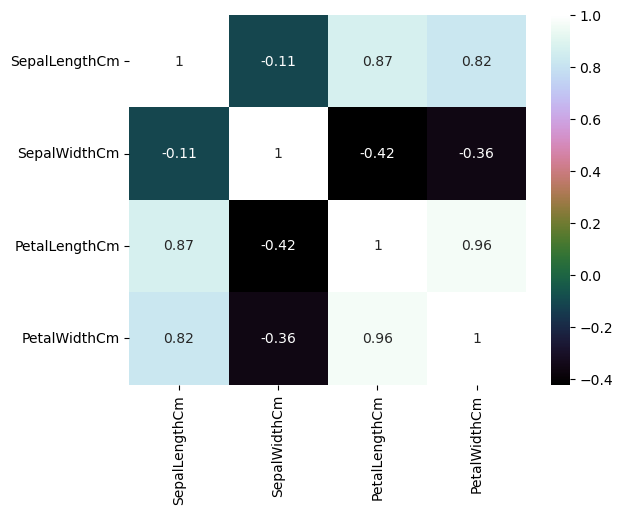

In [29]:
sns.heatmap(Data.corr(),annot=True, cmap='cubehelix')

# 4. Exploratory Data Analysis:

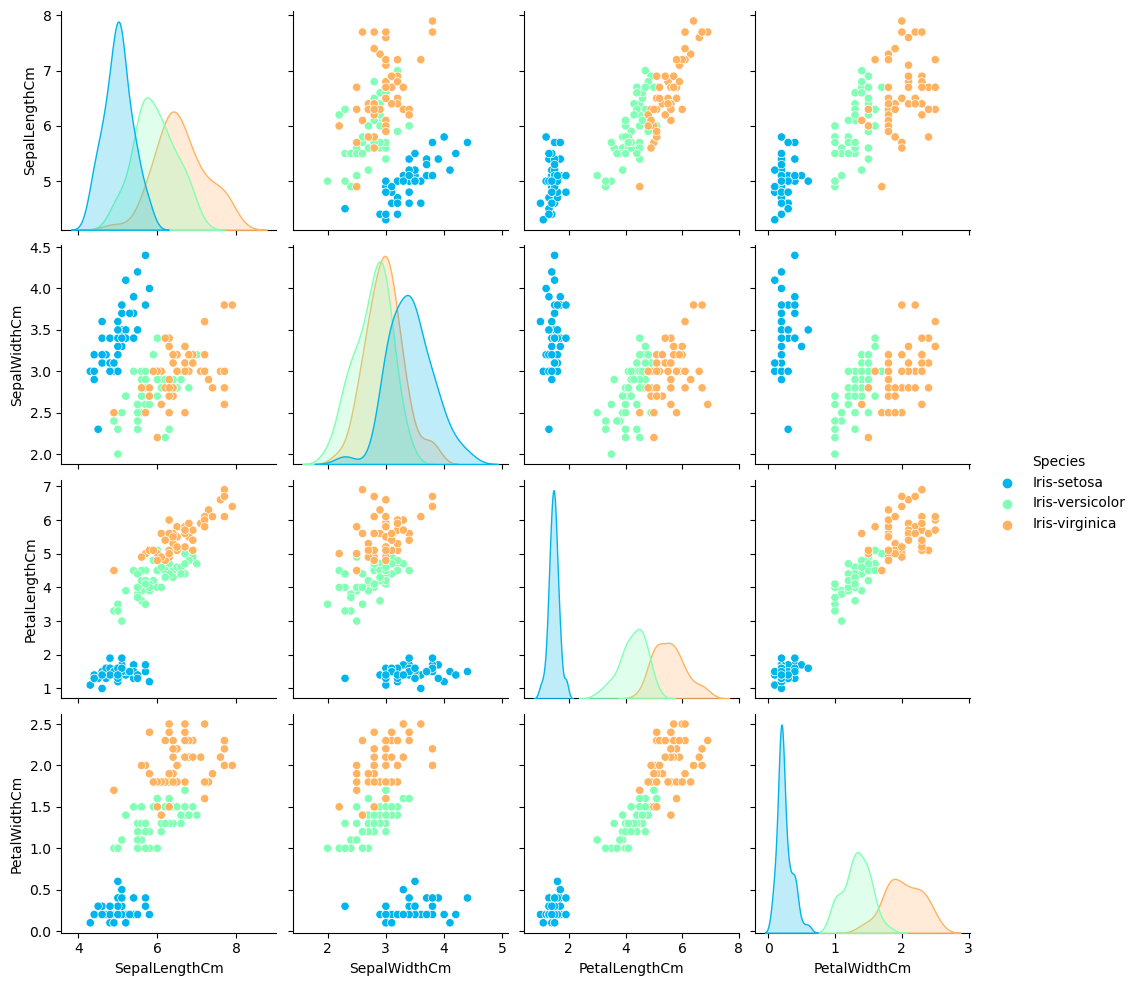

In [44]:
sns.pairplot(Data, palette='rainbow',hue="Species")

array([<AxesSubplot:title={'center':'SepalLengthCm'}>,
       <AxesSubplot:title={'center':'SepalWidthCm'}>,
       <AxesSubplot:title={'center':'PetalLengthCm'}>,
       <AxesSubplot:title={'center':'PetalWidthCm'}>], dtype=object)

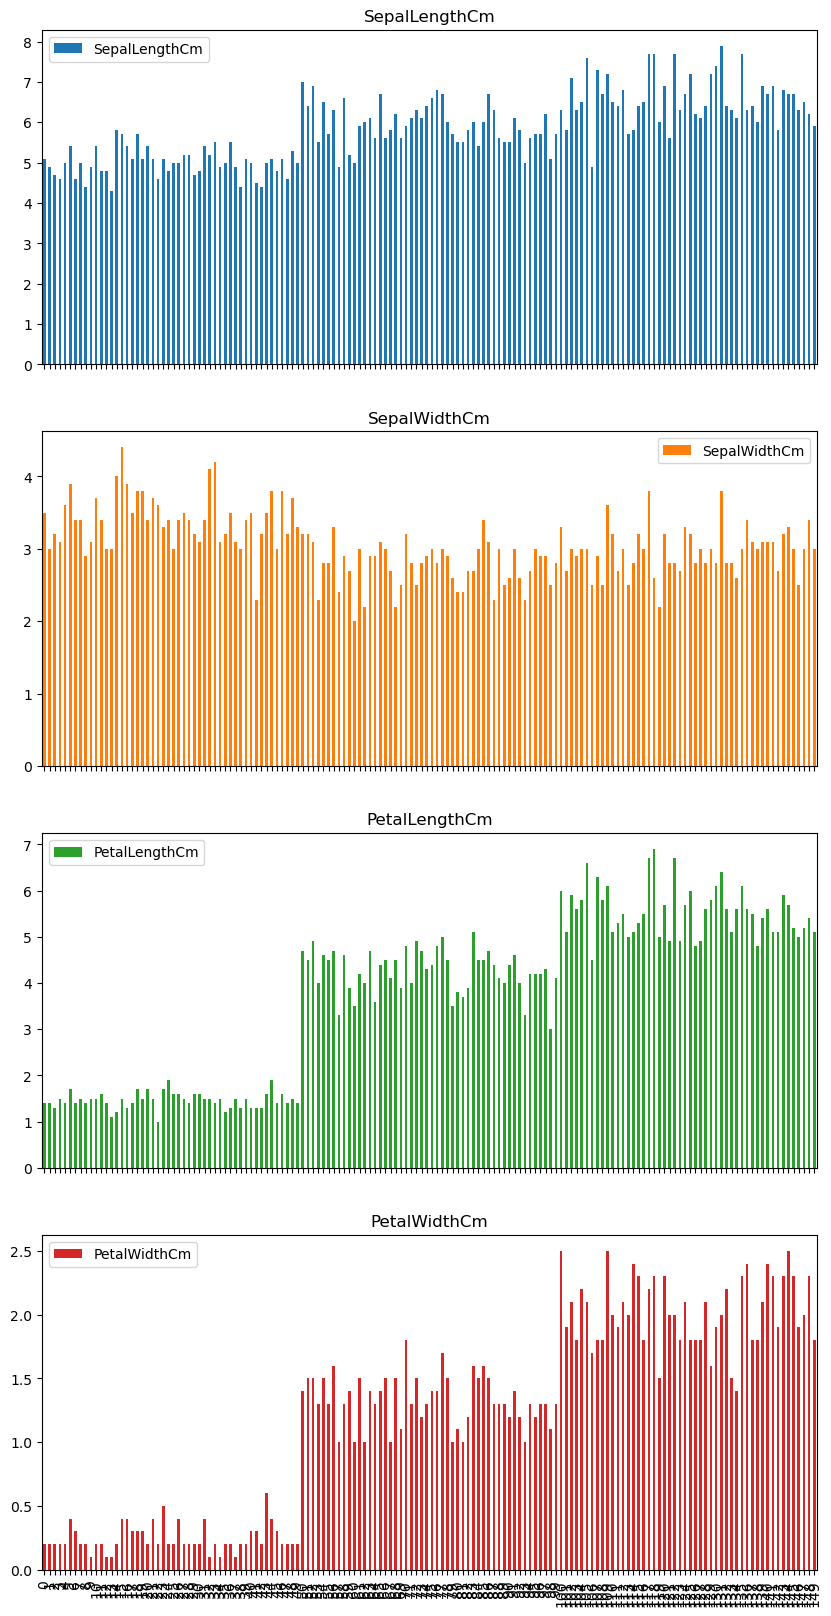

In [50]:
Data.plot(kind='bar',subplots=True,figsize=(10,20))

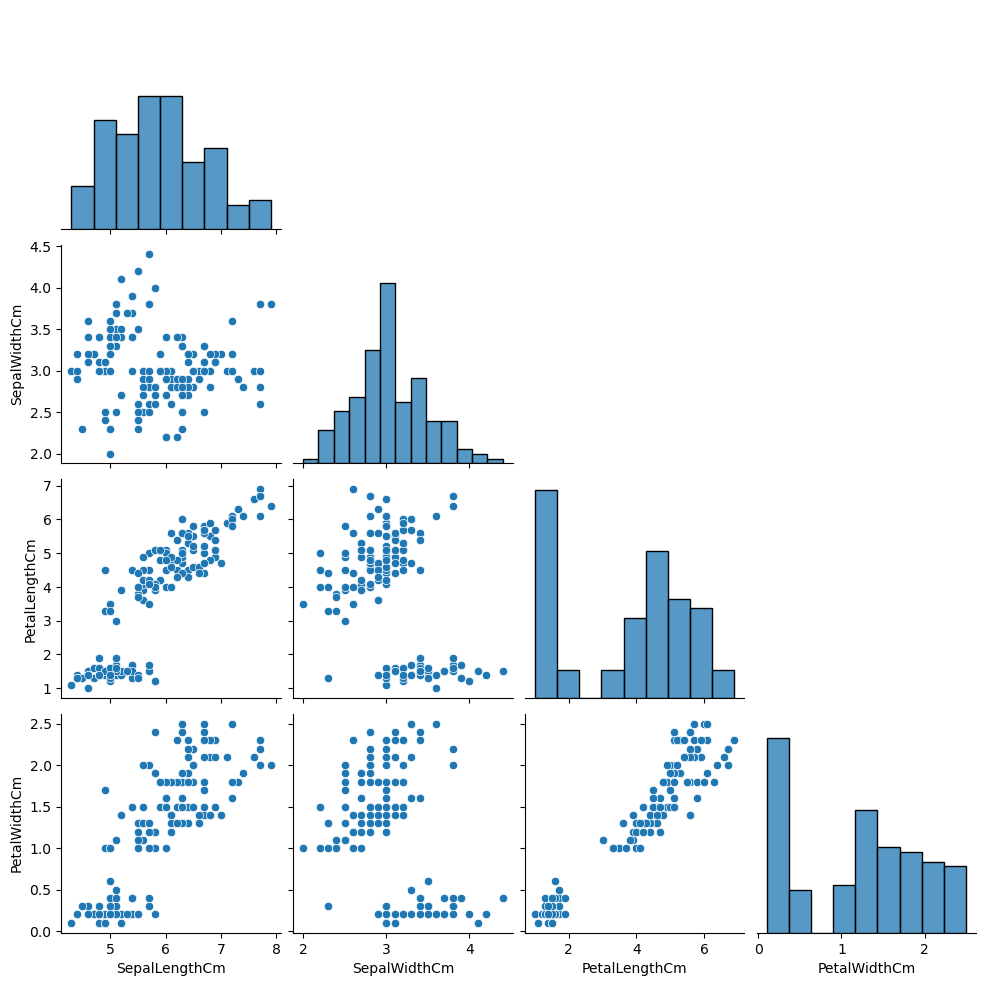

In [52]:
sns.pairplot(Data,corner=True,palette='rainbow')

In [53]:
Data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='count'>

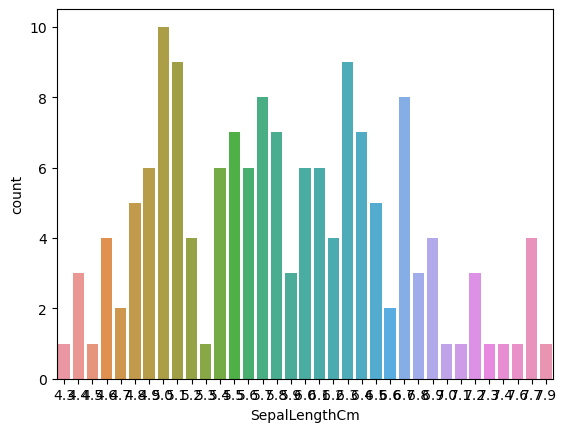

In [54]:
sns.countplot(x='SepalLengthCm',data=Data)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='count'>

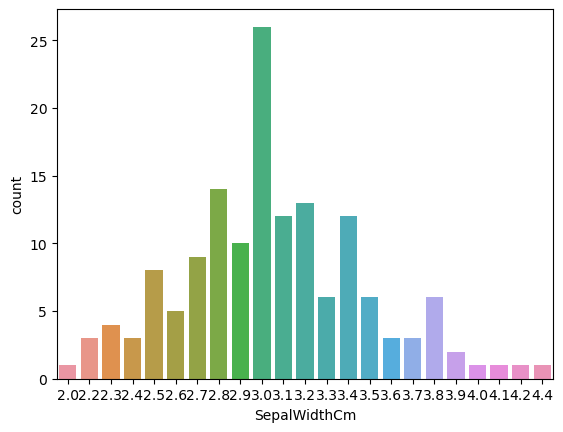

In [55]:
sns.countplot(x='SepalWidthCm',data=Data)

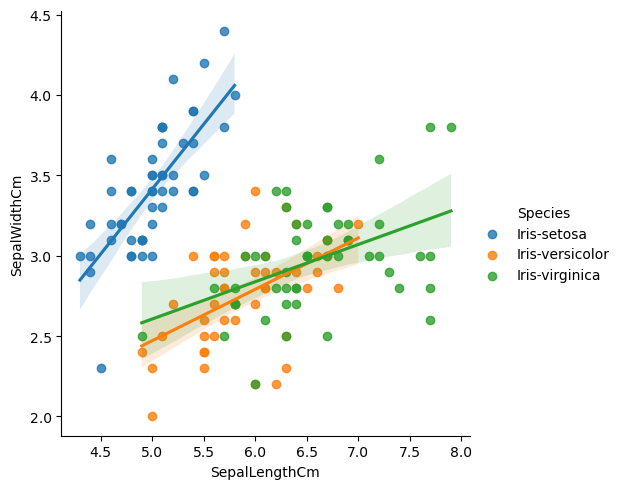

In [57]:
sns.lmplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=Data)              




# 5 Data proccesing :


In [58]:
X = Data.drop('Species', axis = 1)
Y = Data['Species']

In [59]:
# Train - test split 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=100)

In [62]:
# Training the Mode

In [61]:
dtc = DecisionTreeClassifier(criterion = "entropy",random_state =0)
model = dtc.fit(X_train,y_train)
y_predict = dtc.predict(X_test)

# 6 Visualization of tree:

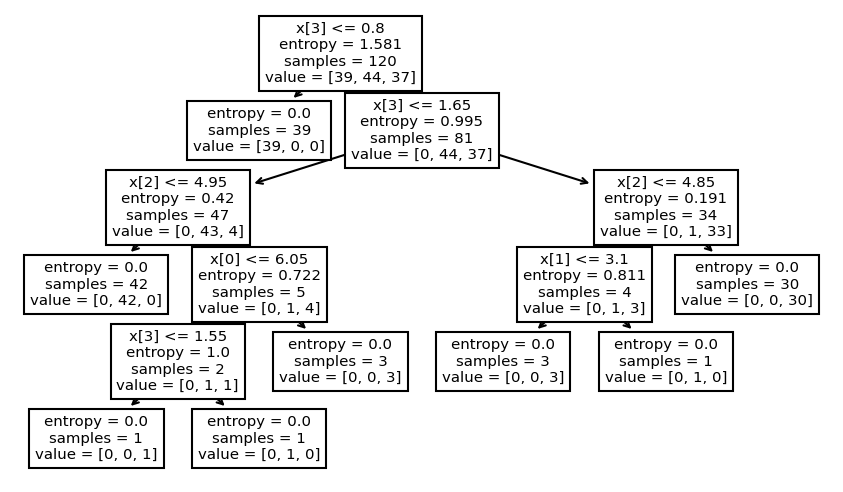

In [64]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 150)

tree.plot_tree(dtc);


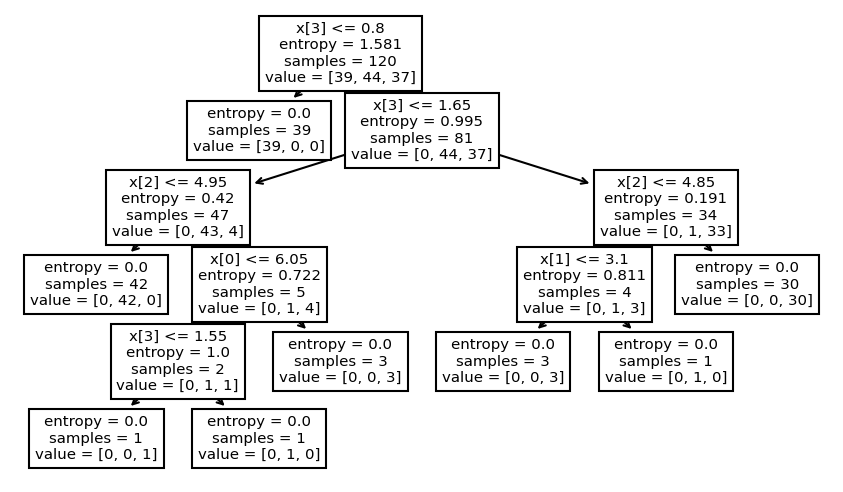

In [65]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 150)

tree.plot_tree(dtc);


In [66]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

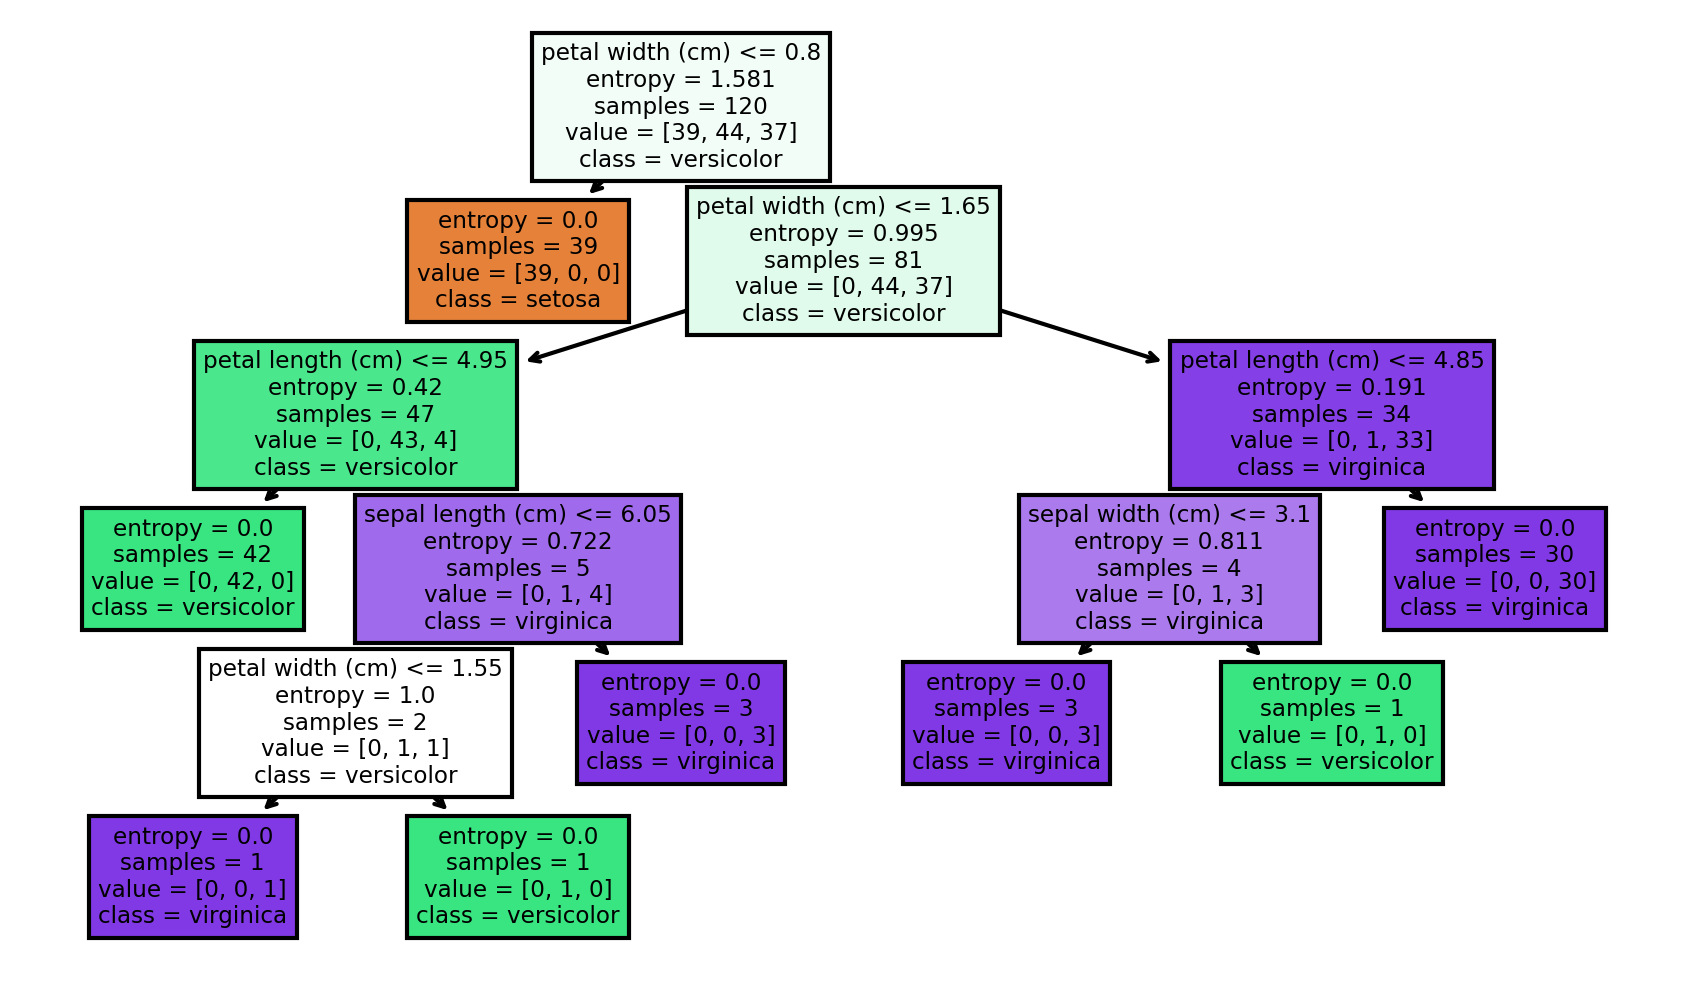

In [67]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 300)

tree.plot_tree(dtc,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# 7 Model Evaluation : 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



<AxesSubplot:>

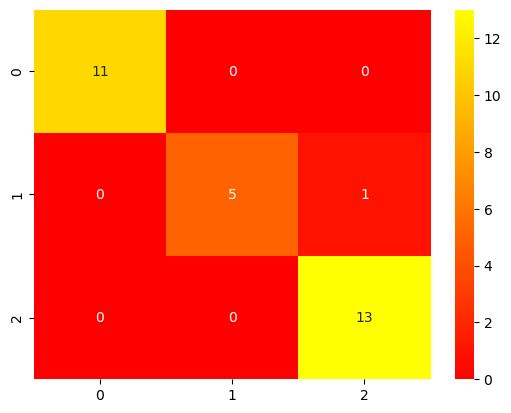

In [72]:
print(classification_report(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict),annot = True,cmap='autumn')

In [73]:
accuracy_score(y_test, y_predict)


0.9666666666666667

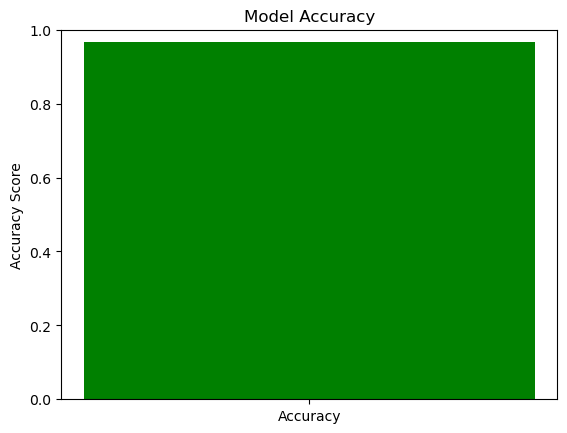

Text(0.5, 1.0, 'Model Accuracy')

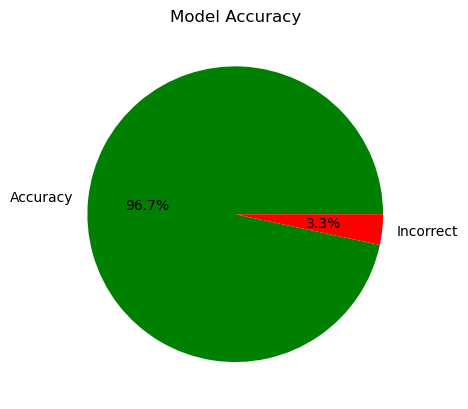

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming you have y_test and y_predict available
# Replace y_test and y_predict with your actual variables

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_predict)

# Create a bar plot with a custom color
plt.bar(['Accuracy'], [accuracy], color='green')
plt.ylim([0, 1])  # Set the y-axis limits between 0 and 1
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy')
plt.show()

# Create a pie chart to visualize the accuracy score
labels = ['Accuracy', 'Incorrect']
sizes = [accuracy, 1 - accuracy]
colors = ['green', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Model Accuracy')


In [78]:
fig.savefig("decision_tree.png")


# Summary :


The project focuses on implementing and visualizing a Decision Tree algorithm for prediction. The example code provided utilizes the scikit-learn library in Python to create a Decision Tree classifier and visualize it graphically.

The project starts by loading the Iris dataset, which is commonly used for classification tasks. The dataset contains four features (sepal length, sepal width, petal length, and petal width) and three classes (setosa, versicolor, and virginica). The features and target variables are stored in the variables X and y, respectively.

A Decision Tree classifier is then created using the DecisionTreeClassifier class from scikit-learn. The classifier is trained on the dataset using the fit() method.

To visualize the Decision Tree, the code employs the tree.plot_tree() function, which generates a graphical representation of the tree. The feature names and class names are provided to label the tree nodes accurately. Additionally, the filled=True argument is used to color the tree nodes based on the majority class.

The visualization of the Decision Tree is saved as a PNG image using fig.savefig(). This image can be referenced and shared as a graphical representation of the trained Decision Tree model.

The project summary emphasizes that the code assumes the necessary libraries, such as scikit-learn, pandas, and matplotlib, are installed. The final results include the visual representation of the Decision Tree, showcasing the decision rules and splitting criteria at each node.

To utilize the trained classifier for prediction on new data, the code suggests passing the new data to the predict() method of the classifier. The predictions would contain the predicted class labels for the new data based on the trained Decision Tree classifier.

However, it's crucial to note that the project summary mentions the importance of evaluating the model's performance using appropriate metrics and techniques. While Decision Trees can be powerful and interpretable models, their effectiveness depends on the dataset and the chosen parameters. Therefore, thorough evaluation and refinement may be necessary for real-world applications.